<a href="https://colab.research.google.com/github/kungumabalaji/balaji-/blob/main/ROC_AND_ADA_BOOST_PREDICTING_THE_SURVIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # random Forest is a versatile and powerful machine learning algorithm commonly used for classification and regression tasks.
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score



In [2]:
import pandas as pd
import json

# 1. Load the notebook content as JSON:
with open('/content/Tutorial_08-Starting code (2).ipynb', 'r') as f:
    notebook_data = json.load(f)

# 2. Find the cell containing the DataFrame:
for cell in notebook_data['cells']:
    # Check if 'source' key exists and is a list with at least one element
    if 'source' in cell and isinstance(cell['source'], list) and len(cell['source']) > 0:
        if 'df' in cell['source'][0]: # Assumes the dataframe is assigned to a variable named 'df'
            # Extract the dataframe data:
            df_data = cell['source'][0].split('df = ')[1]
            # Execute the code to create the DataFrame in the current environment
            exec(df_data)
            break # Exit the loop after finding

In [3]:
if 'df' in locals():
    print("DataFrame successfully created!")
    print(df.info())  # Data types and non-nu ll counts
    print(df.head())  # Preview the first 5 rows
else:
    print("DataFrame was not created. Check the notebook code or logic.")


DataFrame was not created. Check the notebook code or logic.


In [4]:
# Extract all code cells and print their content
for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':  # Only look at code cells
        print("Code Cell:")
        print(''.join(cell.get('source', [])))  # Print the source code from the cell
        print("-" * 80)


Code Cell:
import matplotlib.pyplot as plt
import numpy as np

from scipy import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
--------------------------------------------------------------------------------
Code Cell:
#####################################################################################################################
#Loading data from mat file
#####################################################################################################################
mat_data = io.loadmat('PROACT_data_updated.mat')

#Extracting relevant variables from the loaded dictionary
data=mat_data['data']
data=np.delete(data,18,axis=1)

target=mat_data['survived']
Dt=mat_data['Dt']
labels=mat_data['labels'][0]
labels=np.delete(labels,18)
pat_id=mat_data['Pat_ID']

#####################################################################################################################
## Hard coding a 

In [5]:
import pandas as pd
import json

# 1. Load the notebook content as JSON:
with open('/content/Tutorial_08-Starting code (2).ipynb', 'r') as f:
    notebook_data = json.load(f)

# 2. Find the cell containing the DataFrame:
df_data = None  # Initialize df_data outside the loop
for cell in notebook_data['cells']:
    # Check if 'source' key exists and is a list with at least one element
    if 'source' in cell and isinstance(cell['source'], list) and len(cell['source']) > 0:
        # Check if cell source contains a pandas DataFrame creation
        # This might need adjustment based on how the DataFrame is created in the notebook
        if any('pd.DataFrame' in line or 'pd.read_csv' in line or 'pd.read_excel' in line for line in cell['source']):
            # Execute the entire cell source to create the DataFrame
            for line in cell['source']:
                exec(line)  # Execute each line in the cell to define variables including 'df'
                # Check if 'df' is defined and assign it to df_data
                if 'df' in locals():
                  df_data = locals()['df']
                  break  # Exit loop after finding the dataframe

            break  # Exit the outer loop after processing the cell

# Now df_data should be accessible outside the loop

In [9]:
mat_data = io.loadmat('/content/PROACT_data_updated (2).mat')

data = mat_data['data']
data = np.delete(data, 18, axis=1)

target = mat_data['survived']
Dt = mat_data['Dt']
labels = mat_data['labels'][0]
labels = np.delete(labels, 18)
pat_id = mat_data['Pat_ID']


In [11]:
mat_data = io.loadmat('/content/PROACT_data_updated (2).mat')

data=mat_data['data']
data = np.delete(data,18,axis=1)

target=mat_data['survived']
dt = mat_data['Dt']
labels = mat_data['labels'][0] #extracts the names of the features
labels = np.delete(labels,18)
pat_id = mat_data['Pat_ID']  #contains unique identifiers for each patient.

# Check the shape of the data
print(data.shape)  # Prints the number of rows and columns in the data matrix




(16177, 58)


In [12]:
# okay we have (16177 ROWS , 58 COLUMNS) '

from sklearn.model_selection import train_test_split
X_train,X_test , Traget_train,Target_test = train_test_split(data,target,test_size=0.2,random_state=42)

In [13]:
# i am going to predict the 4 th trimerstep
y_train = Traget_train[:,3]
y_test = Target_test[:,3]

In [14]:
#Training the Random Forest Model


RF = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=100, min_samples_leaf=100, max_depth=5)




In [15]:
#Training the Random Forest Model


RF = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=100, min_samples_leaf=100, max_depth=5)

In [16]:
# Assuming X_train and y_train are your features and target variables respectively
# Make sure they are defined and contain the correct data before running this line.
RF.fit(X_train[y_train > -1, :], y_train[y_train > -1]) # is filtering the data to exclude missing survival information (-1) and only train the model on valid, known data.

RandomForestClassifier(max_depth=5, min_samples_leaf=100, oob_score=True,
                       random_state=42)

In [17]:
#he Random Forest model builds multiple decision trees, each trained on a random subset of the data. Each tree in the forest makes its own prediction.
#The model learns the relationship between the input features (like age, biomarkers, etc.) and the target variable (survival).
# During training, the model looks for patterns in the data, like how age or biomarker levels affect survival.


pred_train = RF.predict_proba(X_train)[:, 1]
pred_test = RF.predict_proba(X_test)[:, 1]



In [18]:
from sklearn.metrics import accuracy_score

# Get the predicted class (0 or 1) by thresholding the predicted probabilities
pred_train_class = (pred_train > 0.5).astype(int)  # If probability > 0.5, predict class 1 (survived)
pred_test_class = (pred_test > 0.5).astype(int)    # If probability > 0.5, predict class 1 (survived)

# Calculate the accuracy on the training and testing data
# Filter pred_train_class to match the filtered y_train
train_accuracy = accuracy_score(y_train[y_train > -1], pred_train_class[y_train > -1])
# Filter pred_test_class to match the filtered y_test
test_accuracy = accuracy_score(y_test[y_test > -1], pred_test_class[y_test > -1]) # This line was modified to filter pred_test_class using the same condition as y_test.

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6902
Testing Accuracy: 0.6739


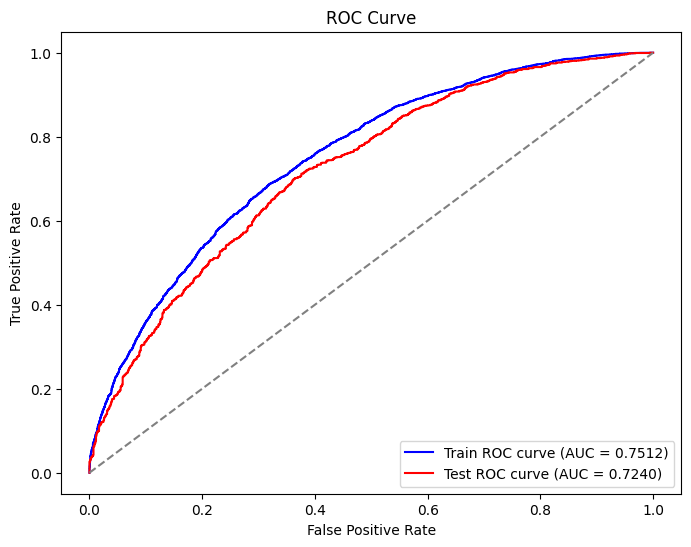

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for the training data
# Filter pred_train to match the filtered y_train
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train[y_train > -1], pred_train[y_train > -1])
train_auc = metrics.auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for the testing data
# Filter pred_test to match the filtered y_test
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test[y_test > -1], pred_test[y_test > -1])
test_auc = metrics.auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {train_auc:.4f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Feature importance extraction
feature_importances_rf = rf_clf.feature_importances_
top_features_idx = np.argsort(feature_importances_rf)[::-1][:25]  # Top 25 features


In [30]:
# same but we are adding the top 25 coloumns
# Train another RF on the top 25 features (Homework 2)  # the aim is The aim is to train a Random Forest classifier using only the top 25 most important features
X_train_top = X_train[:, top_features_idx]  # selecting the top features from the data
X_test_top = X_test[:, top_features_idx]

rf_clf_top = RandomForestClassifier(**rf_params) # new training the random forest with  same parameter
rf_clf_top.fit(X_train_top, y_train)

train_preds_rf_top = rf_clf_top.predict_proba(X_train_top)[:, 1] # predict the
test_preds_rf_top = rf_clf_top.predict_proba(X_test_top)[:, 1]

train_auc_rf_top = roc_auc_score(y_train, train_preds_rf_top)
test_auc_rf_top = roc_auc_score(y_test, test_preds_rf_top)

In [33]:
#AdaBoost is designed to improve the performance of weak models (models with poor accuracy) by combining them into a strong model. Here's how it works and why it's effective:
adaboost_clf = AdaBoostClassifier(n_estimators=100,random_state=42)
adaboost_clf.fit(X_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [34]:
# Step 3: Homework 3 - AdaBoost with feature importance es, AdaBoost is designed to improve the performance of weak models (models with poor accuracy) by combining them into a strong model. Here's how it works and why it's effective:

# like we need ro do the important features in ada boost and we are comparining  the
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

# AdaBoost doesn't have a direct feature_importances_ attribute, but we can aggregate
feature_importances_ab = np.zeros(X.shape[1])
for est in adaboost_clf.estimators_:
    if hasattr(est, "feature_importances_"):
        feature_importances_ab += est.feature_importances_

feature_importances_ab /= len(adaboost_clf.estimators_)
top_features_ab_idx = np.argsort(feature_importances_ab)[::-1][:25]

# Comparison: Random Forest vs AdaBoost Feature Importance
feature_importance_comparison = pd.DataFrame({
    "RandomForest": feature_importances_rf,
    "AdaBoost": feature_importances_ab
})

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


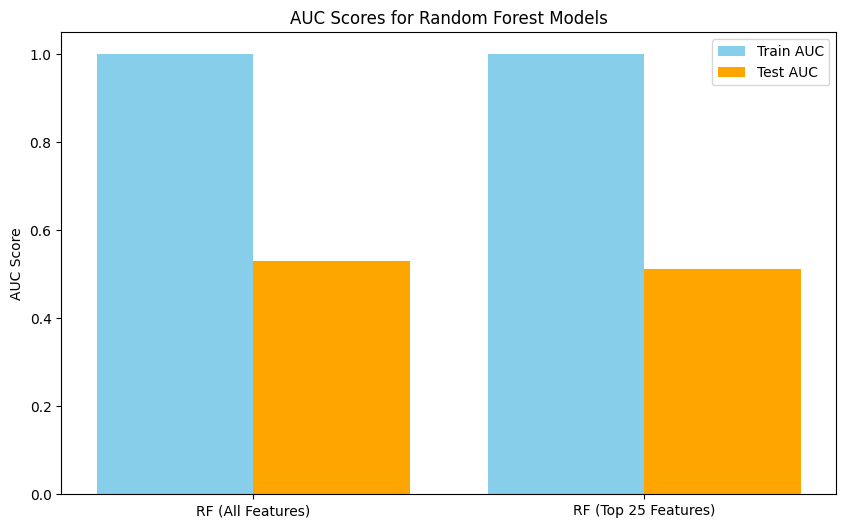

In [25]:
# Visualize AUC Scores
models = ["RF (All Features)", "RF (Top 25 Features)"]
train_aucs = [train_auc_rf, train_auc_rf_top]
test_aucs = [test_auc_rf, test_auc_rf_top]

plt.figure(figsize=(10, 6))
x_pos = np.arange(len(models))
plt.bar(x_pos - 0.2, train_aucs, width=0.4, label='Train AUC', color='skyblue')
plt.bar(x_pos + 0.2, test_aucs, width=0.4, label='Test AUC', color='orange')
plt.xticks(x_pos, models)
plt.ylabel("AUC Score")
plt.title("AUC Scores for Random Forest Models")
plt.legend()
plt.show()

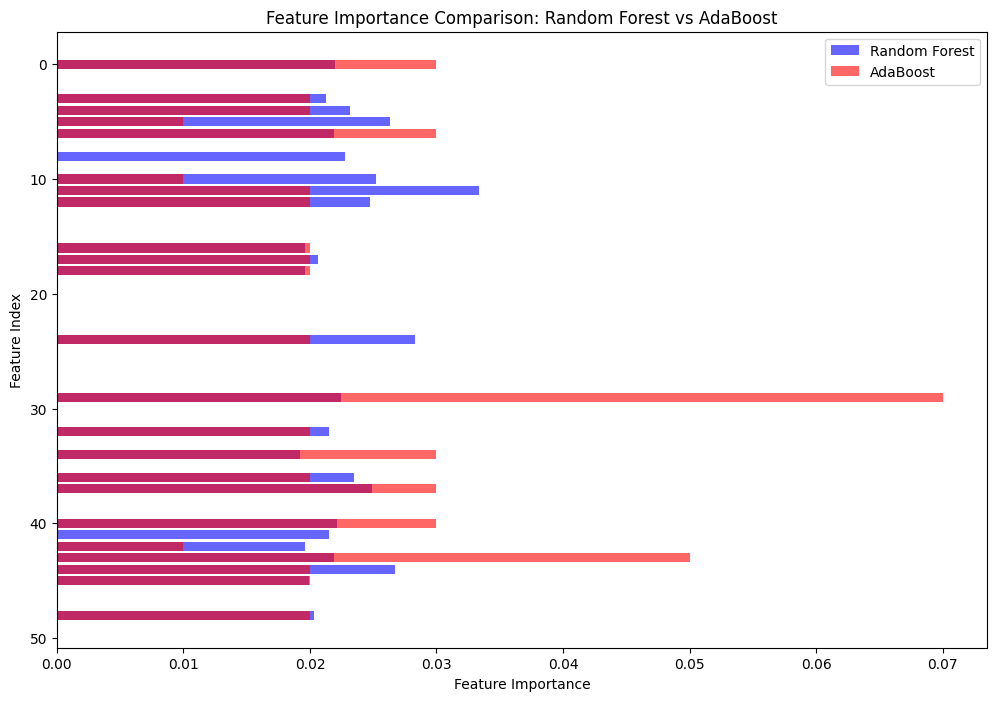

{'RandomForest_AUC': {'train': 0.9999687263493016, 'test': 0.5293117246898759},
 'RandomForest_Top25_AUC': {'train': 1.0, 'test': 0.5111044417767107},
 'FeatureImportance_Comparison':     RandomForest  AdaBoost
 0       0.021985      0.03
 1       0.016271      0.00
 2       0.018496      0.03
 3       0.021250      0.02
 4       0.023193      0.02
 5       0.026314      0.01
 6       0.021872      0.03
 7       0.017944      0.00
 8       0.022765      0.00
 9       0.014666      0.03
 10      0.025218      0.01
 11      0.033351      0.02
 12      0.024777      0.02
 13      0.016719      0.02
 14      0.019032      0.02
 15      0.018845      0.04
 16      0.019604      0.02
 17      0.020651      0.02
 18      0.019631      0.02
 19      0.017887      0.01
 20      0.017042      0.00
 21      0.017185      0.01
 22      0.019043      0.02
 23      0.016335      0.01
 24      0.028281      0.02}

In [29]:
# Visualize Feature Importance Comparison
top_features = feature_importance_comparison.sort_values("RandomForest", ascending=False).head(25)

plt.figure(figsize=(12, 8))
plt.barh(top_features.index, top_features["RandomForest"], color='blue', alpha=0.6, label='Random Forest')
plt.barh(top_features.index, top_features["AdaBoost"], color='red', alpha=0.6, label='AdaBoost')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importance Comparison: Random Forest vs AdaBoost")
plt.legend()
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

# Output AUCs and top feature comparisons
{
    "RandomForest_AUC": {"train": train_auc_rf, "test": test_auc_rf},
    "RandomForest_Top25_AUC": {"train": train_auc_rf_top, "test": test_auc_rf_top},
    "FeatureImportance_Comparison": feature_importance_comparison.head(25)
}